In [1]:
%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import CHGate
from qiskit_aer import AerSimulator
from functools import partial
import numpy as np
from utils import get_image_path

In [2]:
show_unitary = partial(array_to_latex, max_size=100000)
show_state = lambda qc: Statevector(qc).draw('latex')

In [3]:
def get_unitary(qc, sim=AerSimulator()):
    qc_copy = qc.copy()
    qc_copy.save_unitary()
    unitary = sim.run(transpile(qc_copy, sim), shots=1000).result().get_unitary()
    return unitary

In [4]:
def measure(qc, sim=AerSimulator(), qubits=None):
    qc_copy = qc.copy()
    if(not qubits):
        qc_copy.measure_all()
    else:
        qc_copy.measure(qubits, list(range(len(qubits))))
    result = sim.run(transpile(qc_copy, sim), shots=1000).result().get_counts()
    return result

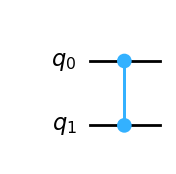

<IPython.core.display.Latex object>

In [5]:
mem = QuantumCircuit(2, name="QROM")
mem.cz(0,1)
display(mem.draw('mpl'))
show_unitary(get_unitary(mem))

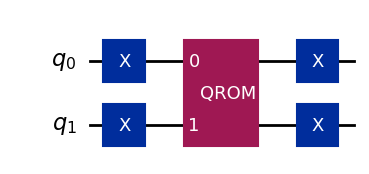

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
qc = QuantumCircuit(2)

qc.x(range(2))
qc.append(mem, [0,1])
qc.x(range(2))

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
show_state(qc)

---

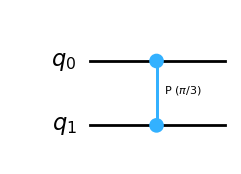

<IPython.core.display.Latex object>

In [7]:
mem = QuantumCircuit(2, name="QROM")
mem.cp(np.pi/3,0,1)
display(mem.draw('mpl'))
show_unitary(get_unitary(mem))

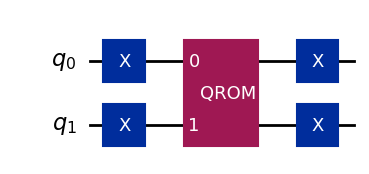

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
qc = QuantumCircuit(2)

qc.x(range(2))
qc.append(mem, [0,1])
qc.x(range(2))

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
show_state(qc)

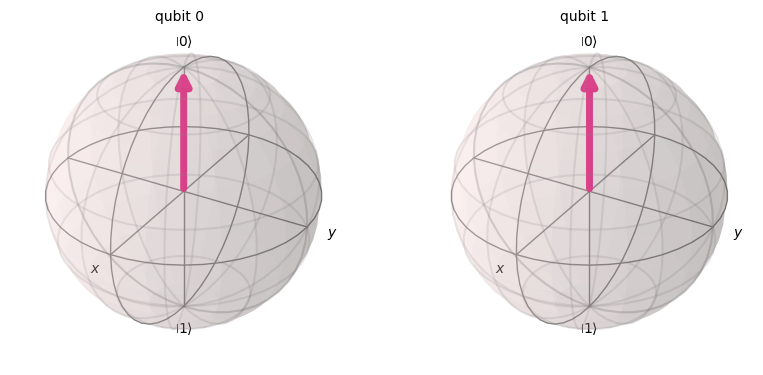

In [9]:
plot_bloch_multivector(qc)

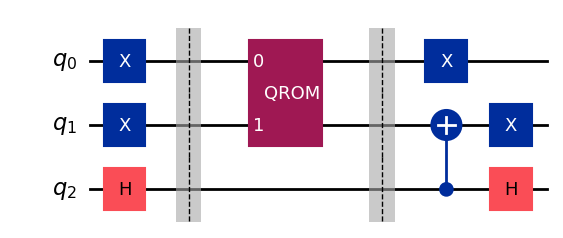

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

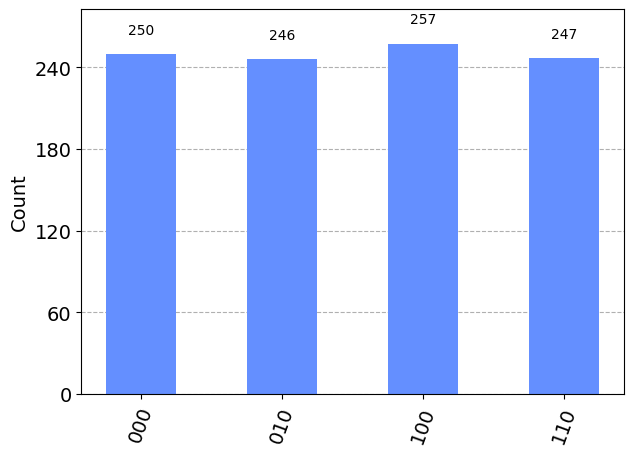

In [10]:
qc = QuantumCircuit(3)

qc.x(range(2))
qc.h(2)

qc.barrier()
qc.append(mem, [0,1])
qc.barrier()
qc.cx(2,1)
qc.x(range(2))
qc.h(2)



display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
display(show_state(qc))
display(plot_histogram(measure(qc)))


---

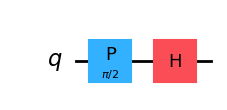

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

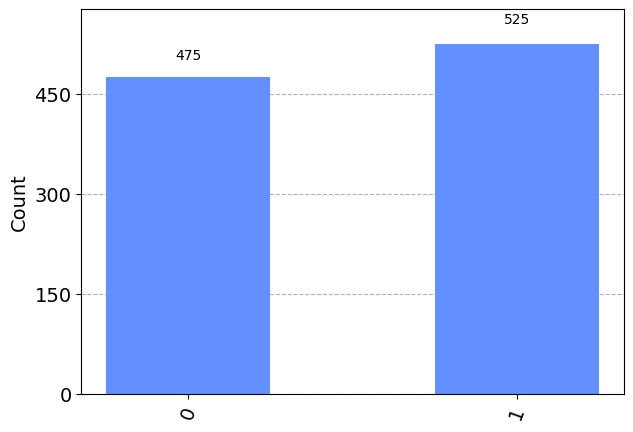

In [11]:
qc = QuantumCircuit(1)
#qc.h(0)
qc.p(np.pi/2, 0)
#qc.barrier()
#qc.cx(1,0)
qc.h(0)

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
display(show_state(qc))
display(plot_histogram(measure(qc)))

---

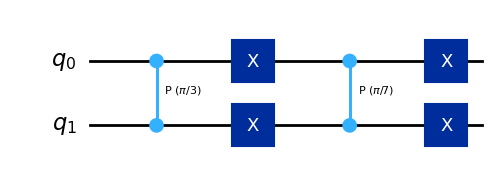

<IPython.core.display.Latex object>

In [12]:
mem = QuantumCircuit(2, name="QROM")
mem.cp(np.pi/3,0,1)
mem.x(range(2))
mem.cp(np.pi/7,0,1)
mem.x(range(2))
display(mem.draw('mpl'))
show_unitary(get_unitary(mem))

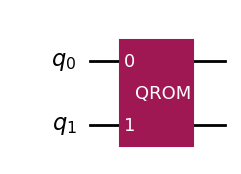

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
qc = QuantumCircuit(2)

#qc.x(range(2))
qc.append(mem, [0,1])
#qc.x(range(2))

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
show_state(qc)

---

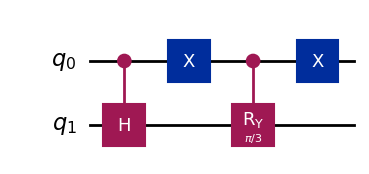

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
mem = QuantumCircuit(2, name="qrom")
mem.ch(0,1)
mem.x(0)
mem.cry(np.pi/3, 0, 1)
mem.x(0)
display(mem.draw('mpl', filename=get_image_path("qrom_1.png")))
display(show_unitary(get_unitary(mem)))
show_state(mem)

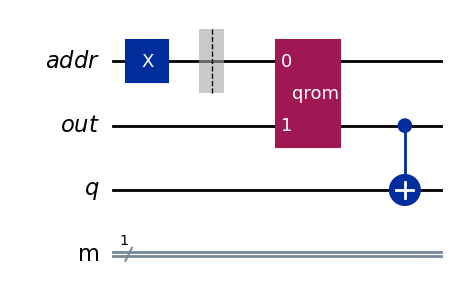

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

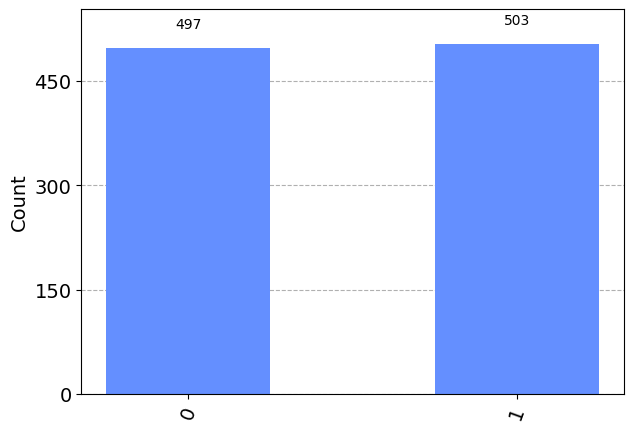

In [15]:
addr = QuantumRegister(1, name="addr")
out = QuantumRegister(1, name="out")
q = QuantumRegister(1,name="q")
result = ClassicalRegister(1, "m")

qc = QuantumCircuit(addr, out, q, result)

qc.x(addr)

qc.barrier(addr)
qc.append(mem, [addr, out])

qc.cx(out, q)

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
display(show_state(qc))
display(plot_histogram(measure(qc, qubits=[2])))

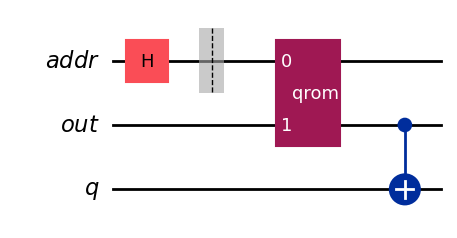

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
addr = QuantumRegister(1, name="addr")
out = QuantumRegister(1, name="out")
q = QuantumRegister(1,name="q")
result = ClassicalRegister(1, "m")

qc = QuantumCircuit(addr, out, q)

qc.h(addr)

qc.barrier(addr)
qc.append(mem, [addr, out])

qc.cx(out, q)

display(qc.draw('mpl', filename=get_image_path("qrom_1_usage.png")))
display(show_unitary(get_unitary(qc)))
display(show_state(qc))
#display(plot_histogram(measure(qc, qubits=[2])))

---

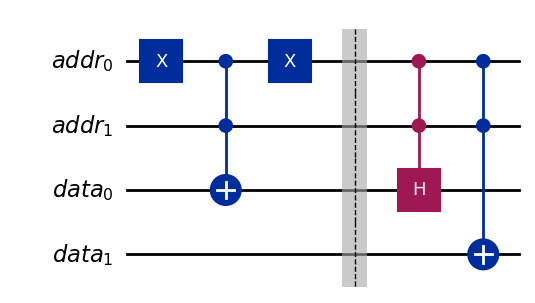

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [17]:
CCH = CHGate().control(1)

addr = QuantumRegister(2, name="addr")
data = QuantumRegister(2, name="data")

mem = QuantumCircuit(addr, data, name="qrom")

mem.x(addr[0])
mem.ccx(addr[0], addr[1], data[0])
mem.x(addr[0])
mem.barrier()
mem.append(CCH, [addr[0], addr[1], data[0]])
mem.ccx(addr[0], addr[1], data[1])

display(mem.draw('mpl'))
display(show_unitary(get_unitary(mem)))
show_state(mem)

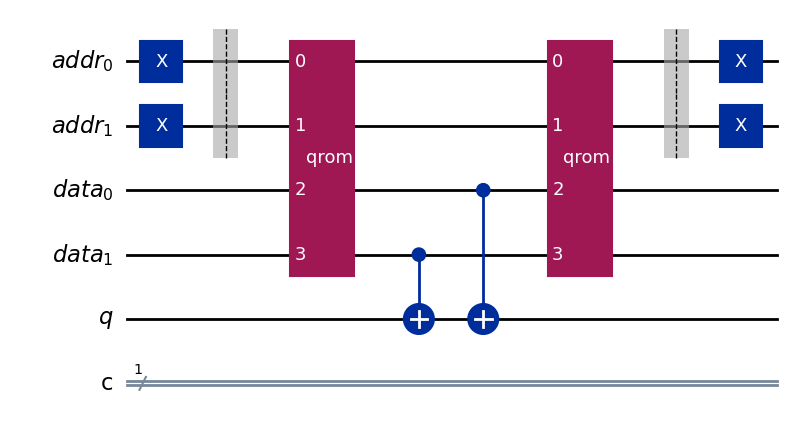

<IPython.core.display.Latex object>

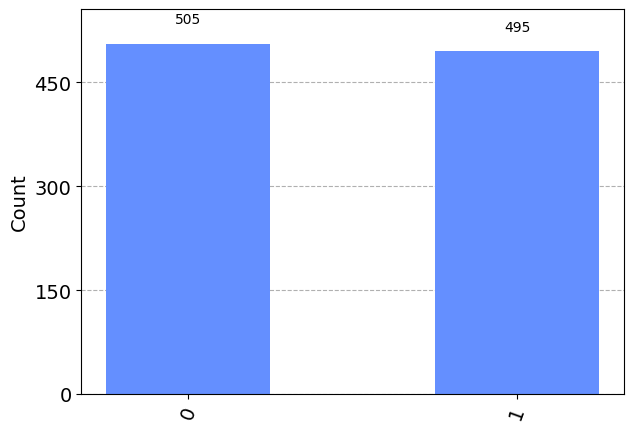

In [18]:
addr = QuantumRegister(2, name="addr")
data = QuantumRegister(2, name="data")
q = QuantumRegister(1, name="q")
out = ClassicalRegister(1, name="c")

qc = QuantumCircuit(addr, data, q, out)

qc.x(range(2))
qc.barrier(addr)
qc.append(mem, [*addr, *data])

qc.cx(data[1], q[0])
qc.cx(data[0], q[0])

qc.append(mem, [*addr, *data])
qc.barrier(addr)
qc.x(range(2))



display(qc.draw('mpl'))
#display(show_unitary(get_unitary(qc)))
display(show_state(qc))
display(plot_histogram(measure(qc, qubits=[4])))

In [19]:
#memory with teleportation

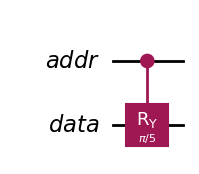

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [20]:
addr = QuantumRegister(1, name="addr")
data = QuantumRegister(1, name="data")

mem = QuantumCircuit(addr, data, name="qrom")
mem.cry(np.pi/5, 0, 1)

display(mem.draw('mpl'))
display(show_unitary(get_unitary(mem)))
show_state(mem)

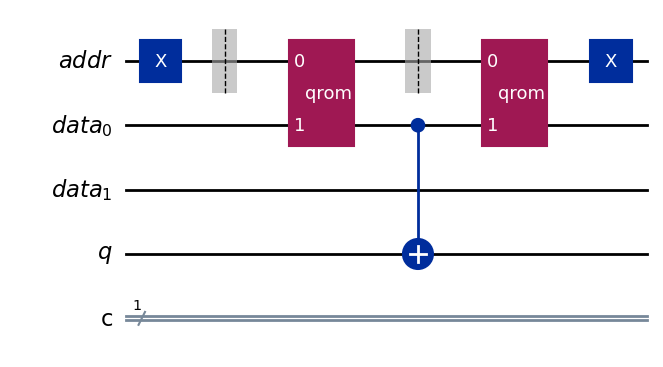

<IPython.core.display.Latex object>

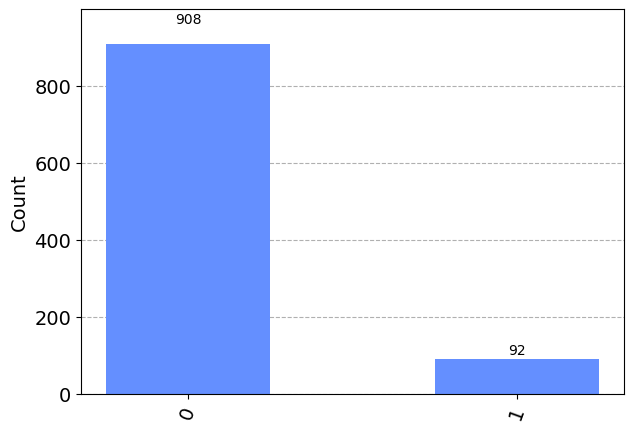

In [21]:
addr = QuantumRegister(1, name="addr")
data = QuantumRegister(2, name="data")
q = QuantumRegister(1, name="q")
out = ClassicalRegister(1, name="c")

qc = QuantumCircuit(addr, data, q, out)

qc.x(addr)
qc.barrier(addr)
qc.append(mem, [addr, data[0]])

qc.cx(data[0], q)

qc.barrier(addr)
qc.append(mem, [addr, data[0]])
qc.x(addr)



display(qc.draw('mpl'))
#display(show_unitary(get_unitary(qc)))
display(show_state(qc))
display(plot_histogram(measure(qc, qubits=[3])))

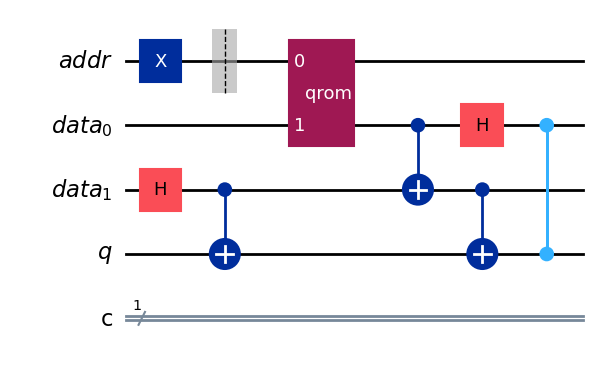

<IPython.core.display.Latex object>

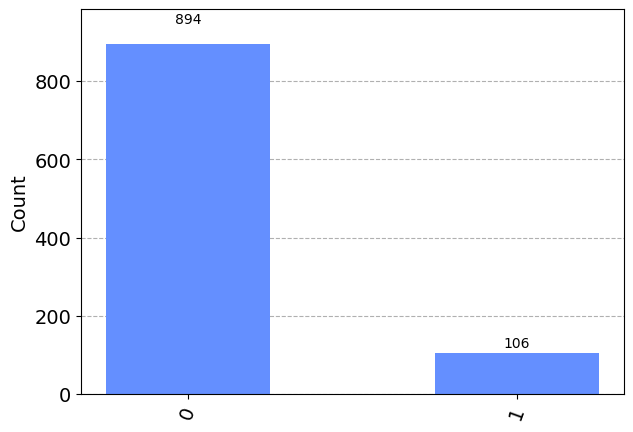

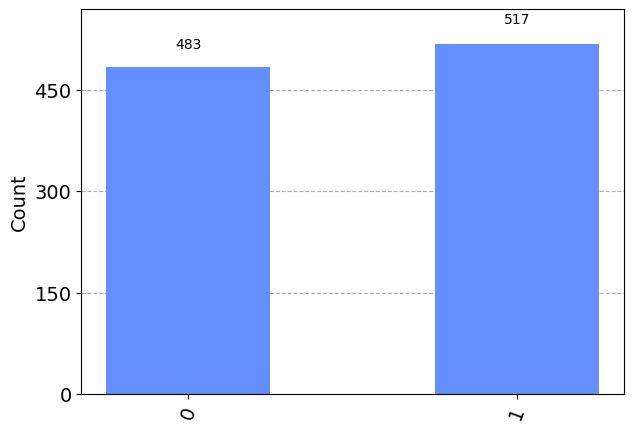

In [22]:
addr = QuantumRegister(1, name="addr")
data = QuantumRegister(2, name="data")
q = QuantumRegister(1, name="q")
out = ClassicalRegister(1, name="c")

qc = QuantumCircuit(addr, data, q, out)

qc.x(addr)
qc.barrier(addr)
qc.append(mem, [addr, data[0]])

qc.h(data[1])
qc.cx(data[1], q)

qc.cx(data[0], data[1])
qc.h(data[0])

qc.cx(data[1], q)
qc.cz(data[0], q)


display(qc.draw('mpl'))
#display(show_unitary(get_unitary(qc)))
display(show_state(qc))
display(plot_histogram(measure(qc, qubits=[3])))
display(plot_histogram(measure(qc, qubits=[1])))


In [23]:
(np.cos(np.pi/5/2))**2, (np.sin(np.pi/5/2))**2

(0.9045084971874736, 0.09549150281252627)

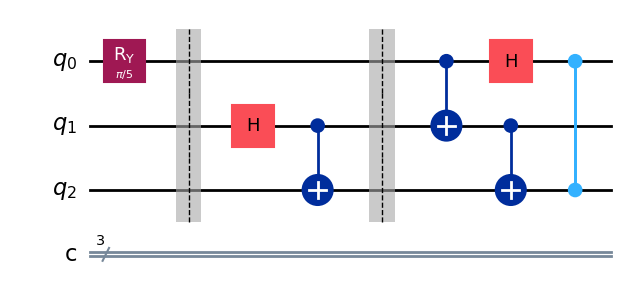

<IPython.core.display.Latex object>

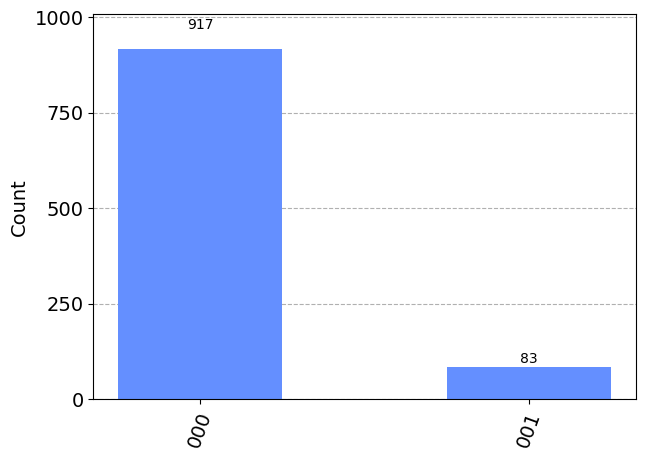

In [24]:
qc = QuantumCircuit(3,3)
qc.ry(np.pi/5, 0)
qc.barrier()

qc.h(1)
qc.cx(1,2)

qc.barrier()

qc.cx(0,1)
qc.h(0)

qc.cx(1,2)
qc.cz(0,2)
qc.draw('mpl')

display(qc.draw('mpl'))
#display(show_unitary(get_unitary(qc)))
display(show_state(qc))
display(plot_histogram(measure(qc, qubits=[2])))

---

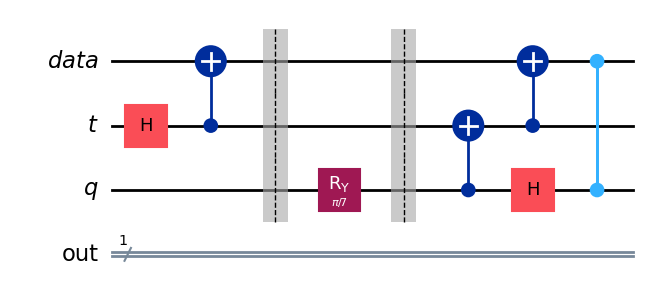

<IPython.core.display.Latex object>

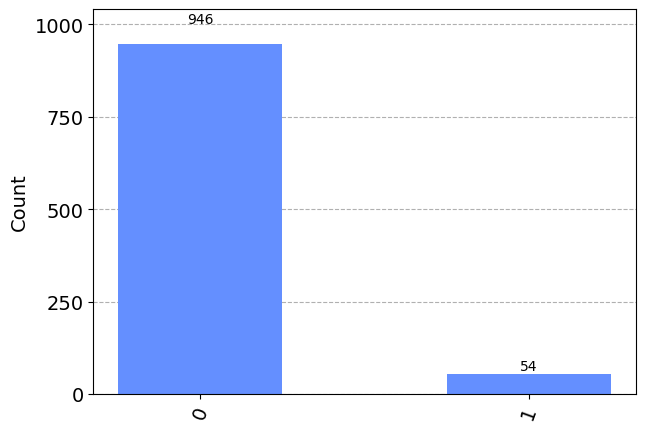

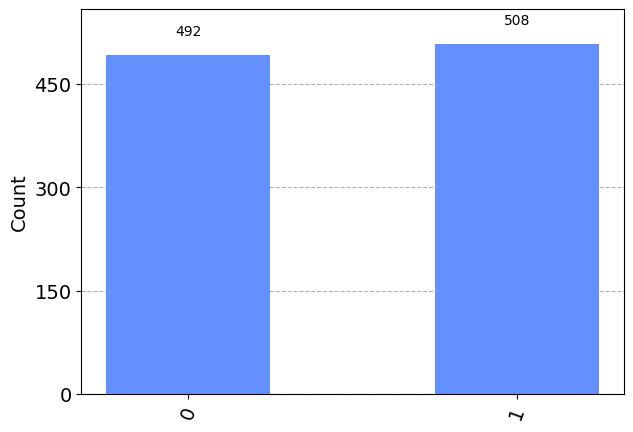

In [49]:
data = QuantumRegister(1, name="data")
teleportation_provider = QuantumRegister(1, name="t")
q = QuantumRegister(1, name="q")
meas = ClassicalRegister(1, name="out")

qram = QuantumCircuit(data, teleportation_provider, q,meas)

qram.h(teleportation_provider)
qram.cx(teleportation_provider, data)

qram.barrier()

qram.ry(np.pi/7, q)

qram.barrier()

qram.cx(q, teleportation_provider)
qram.h(q)
qram.cx(teleportation_provider, data)
qram.cz(q, data)

display(qram.draw('mpl'))
#display(show_unitary(get_unitary(qram)))
display(show_state(qram))
display(plot_histogram(measure(qram, qubits=[0])))
display(plot_histogram(measure(qram, qubits=[2])))

In [48]:
np.cos(np.pi/7/2)**2, np.sin(np.pi/7/2)**2

(0.9504844339512096, 0.049515566048790434)

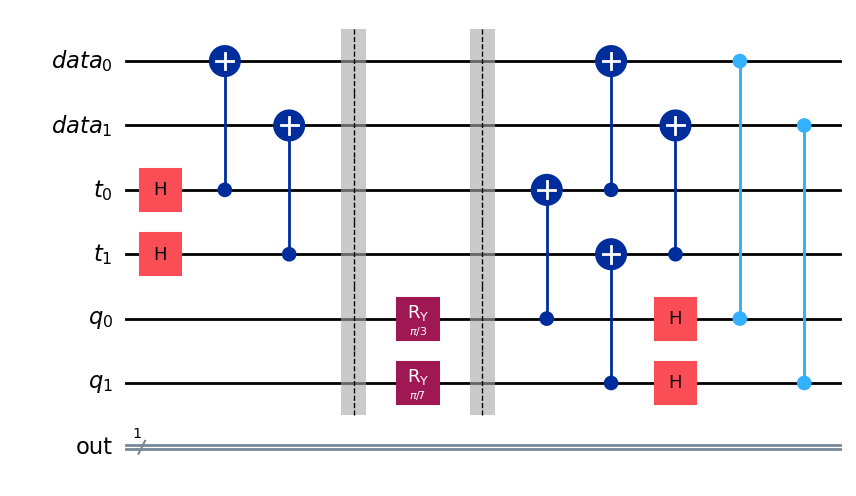

<IPython.core.display.Latex object>

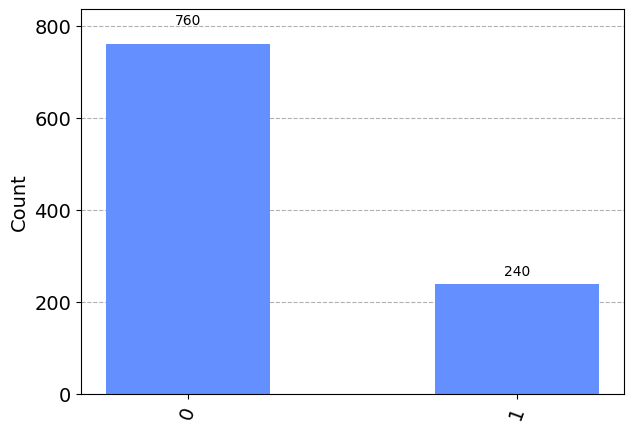

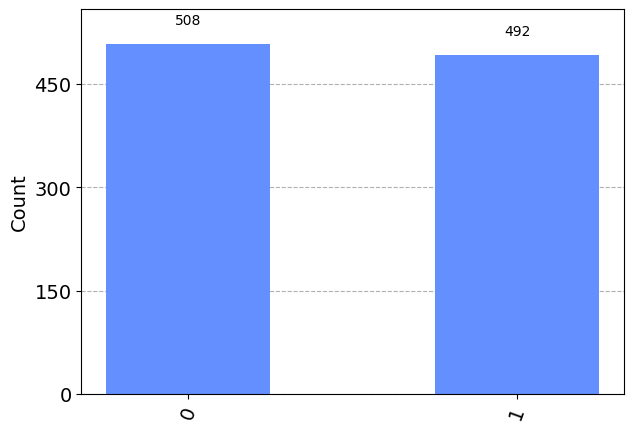

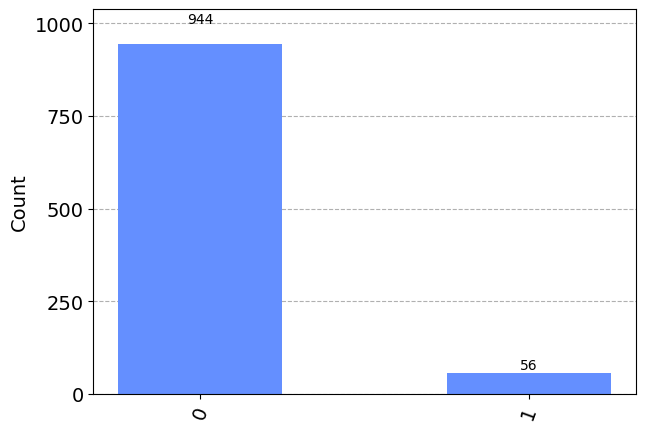

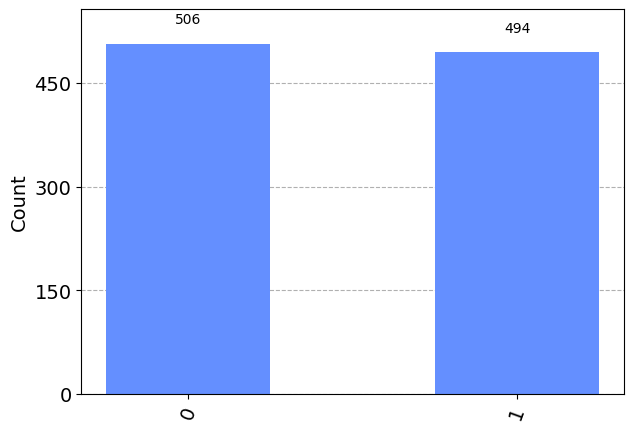

In [22]:
data = QuantumRegister(2, name="data")
teleportation_provider = QuantumRegister(2, name="t")
q = QuantumRegister(2, name="q")
meas = ClassicalRegister(1, name="out")

qram = QuantumCircuit(data, teleportation_provider, q,meas)

qram.h(teleportation_provider)
qram.cx(teleportation_provider, data)

qram.barrier()

qram.ry(np.pi/3, q[0])
qram.ry(np.pi/7, q[1])

qram.barrier()

qram.cx(q, teleportation_provider)
qram.h(q)
qram.cx(teleportation_provider, data)
qram.cz(q, data)

display(qram.draw('mpl', filename=get_image_path('qram.png')))
#display(show_unitary(get_unitary(qram)))
display(show_state(qram))
display(plot_histogram(measure(qram, qubits=[0])))
display(plot_histogram(measure(qram, qubits=[4])))
display(plot_histogram(measure(qram, qubits=[1])))
display(plot_histogram(measure(qram, qubits=[5])))

In [53]:
np.cos(np.pi/3/2)**2, np.sin(np.pi/3/2)**2

(0.7500000000000001, 0.24999999999999994)

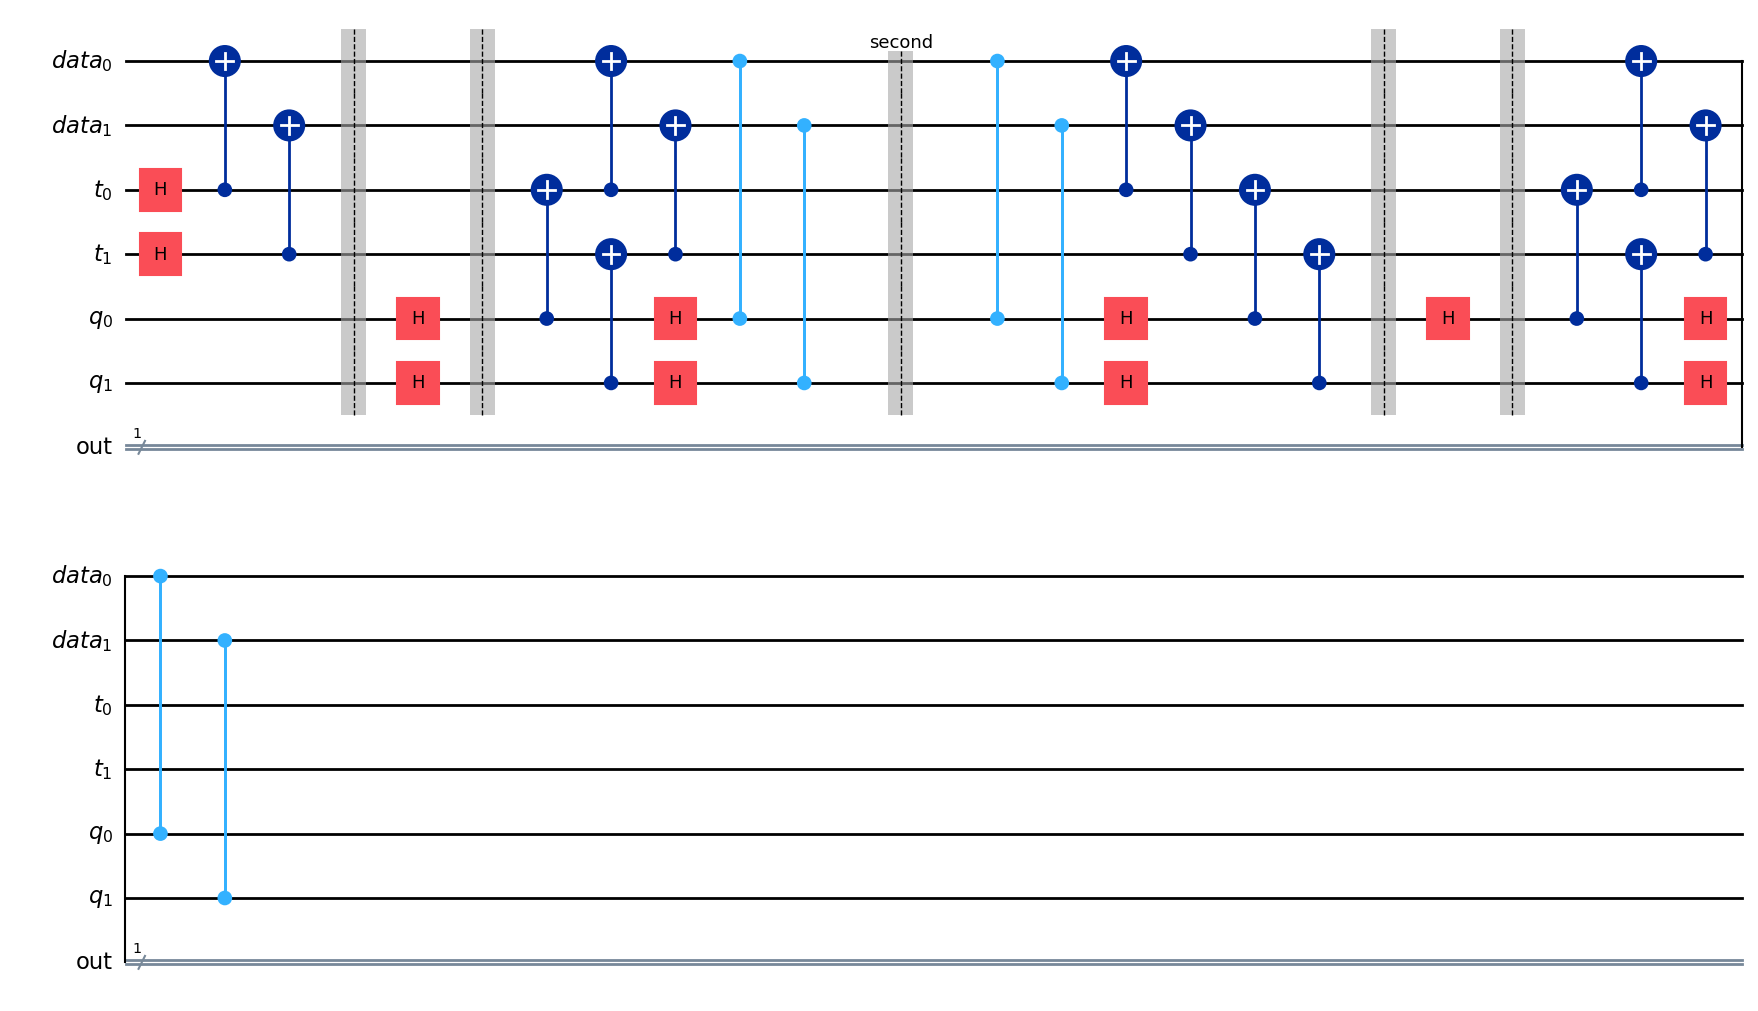

<IPython.core.display.Latex object>

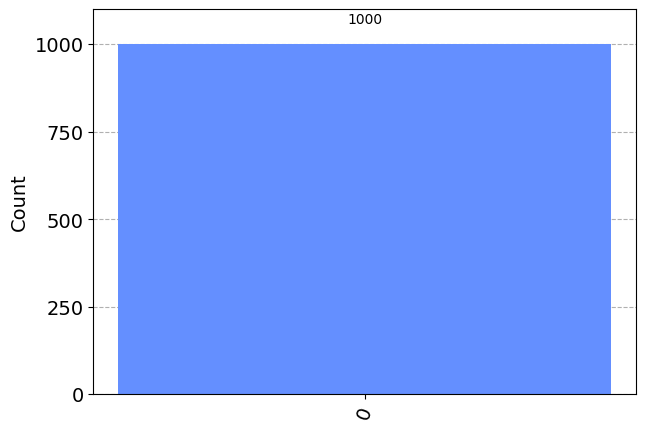

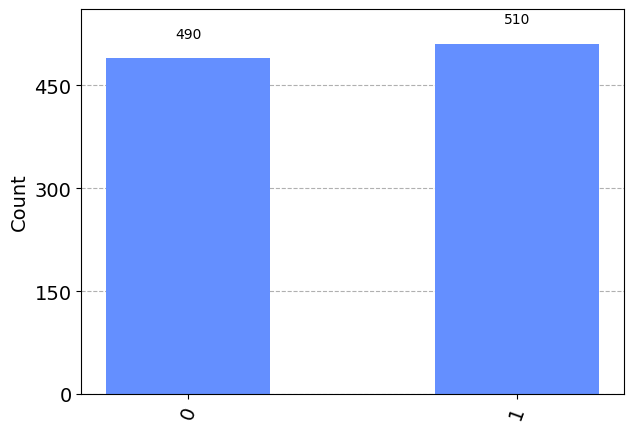

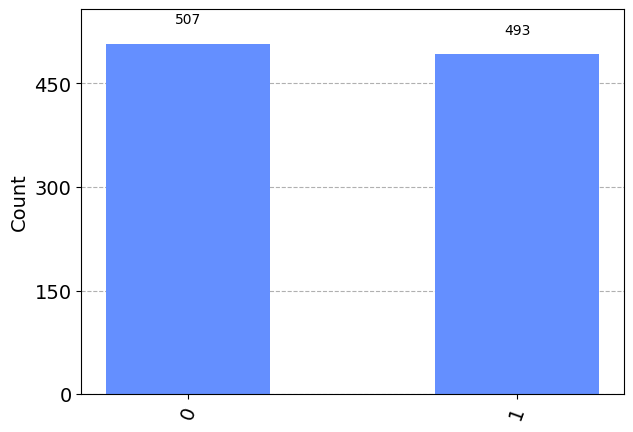

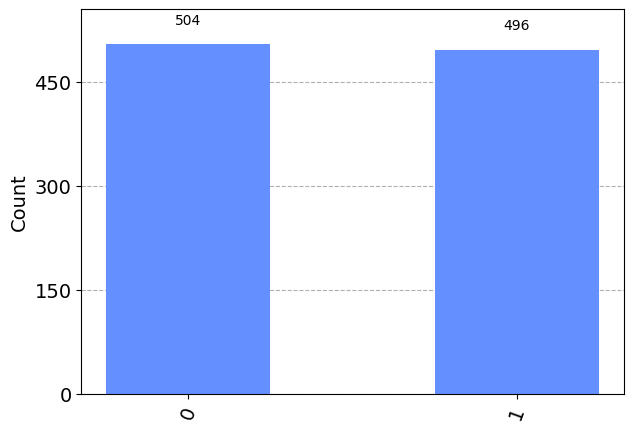

In [16]:
data = QuantumRegister(2, name="data")
teleportation_provider = QuantumRegister(2, name="t")
q = QuantumRegister(2, name="q")
meas = ClassicalRegister(1, name="out")

qram = QuantumCircuit(data, teleportation_provider, q,meas)

qram.h(teleportation_provider)
qram.cx(teleportation_provider, data)

qram.barrier()

qram.h(q[0])
qram.h(q[1])

qram.barrier()

qram.cx(q, teleportation_provider)
qram.h(q)
qram.cx(teleportation_provider, data)
qram.cz(q, data)

qram.barrier(label='second')
qram.cz(q, data)
qram.cx(teleportation_provider, data)
qram.h(q)
qram.cx(q, teleportation_provider)

qram.barrier()
qram.h(q[0])
qram.barrier()
qram.cx(q, teleportation_provider)
qram.h(q)
qram.cx(teleportation_provider, data)
qram.cz(q, data)


display(qram.draw('mpl'))
#display(show_unitary(get_unitary(qram)))
display(show_state(qram))
display(plot_histogram(measure(qram, qubits=[0])))
display(plot_histogram(measure(qram, qubits=[4])))
display(plot_histogram(measure(qram, qubits=[1])))
display(plot_histogram(measure(qram, qubits=[5])))

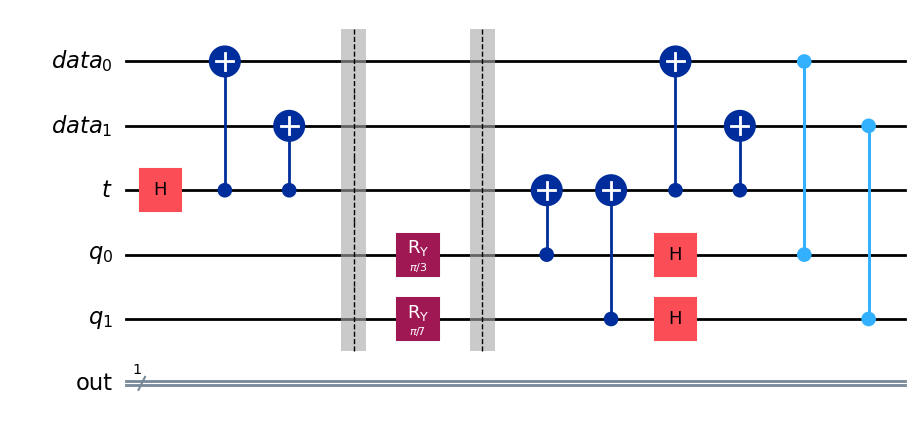

<IPython.core.display.Latex object>

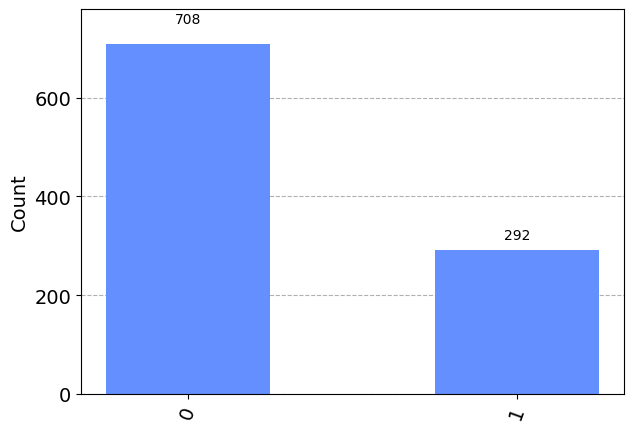

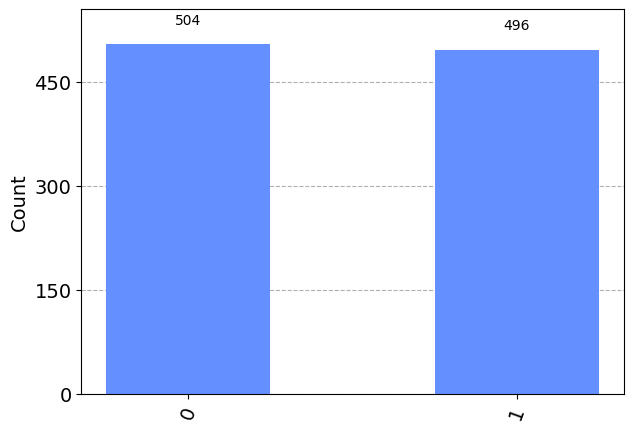

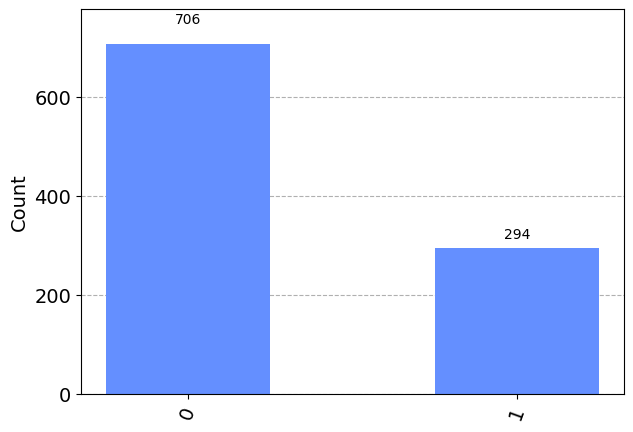

CircuitError: 'Index 5 out of range for size 5.'

In [21]:
data = QuantumRegister(2, name="data")
teleportation_provider = QuantumRegister(1, name="t")
q = QuantumRegister(2, name="q")
meas = ClassicalRegister(1, name="out")

qram = QuantumCircuit(data, teleportation_provider, q,meas)

qram.h(teleportation_provider)
qram.cx(teleportation_provider, data)

qram.barrier()

qram.ry(np.pi/3, q[0])
qram.ry(np.pi/7, q[1])

qram.barrier()

qram.cx(q, teleportation_provider)
qram.h(q)
qram.cx(teleportation_provider, data)
qram.cz(q, data)

display(qram.draw('mpl', filename=get_image_path('qram.png')))
#display(show_unitary(get_unitary(qram)))
display(show_state(qram))
display(plot_histogram(measure(qram, qubits=[0])))
display(plot_histogram(measure(qram, qubits=[4])))
display(plot_histogram(measure(qram, qubits=[1])))
display(plot_histogram(measure(qram, qubits=[5])))